In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Importation des données
# Remarque : pour me simplifier la vie et rendre les graphique plus lisibles, 
# je ne m'intéresserais que dans un 1er temps aux données d'Apple.

df = pd.read_pickle("./data/source.pkl")["APPLE"]

# Ouverture du jeu de données

display(df.head())
display(df.describe())
display(df.info())

,open,high,low,close,volume
date,,,,,
2010-01-04,7.62,7.66,7.58,7.64,493729600
2010-01-05,7.66,7.70,7.62,7.66,601904800
2010-01-06,7.66,7.69,7.53,7.53,552160000
2010-01-07,7.56,7.57,7.47,7.52,477131200
2010-01-08,7.51,7.57,7.47,7.57,447876740


,open,high,low,close,volume
count,3848.000000,3848.000000,3848.000000,3848.000000,3.848000e+03
mean,72.690670,73.477347,71.951988,72.751302,2.267414e+08
std,68.065093,68.825210,67.379506,68.146111,2.172893e+08
min,6.870000,7.000000,6.790000,6.860000,2.323470e+07
25%,20.825000,21.017500,20.545000,20.850000,8.336790e+07
50%,38.560000,38.865000,38.325000,38.585000,1.374447e+08
75%,134.132500,135.282500,132.760000,134.145000,3.028067e+08
max,258.190000,260.100000,257.630000,259.020000,1.880998e+09


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3848 entries, 2010-01-04 to 2025-04-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3848 non-null   float64
 1   high    3848 non-null   float64
 2   low     3848 non-null   float64
 3   close   3848 non-null   float64
 4   volume  3848 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 180.4 KB


None

In [54]:
# Définition d'une fonction pour grapher rapidement

def plotter(df, col_names, title):
    plt.figure(figsize=(12, 6))
    
    for col_name in col_names:
        plt.plot(df.index, df[col_name], label = col_name)
    
    plt.title(title)
    plt.xlabel("Time step")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

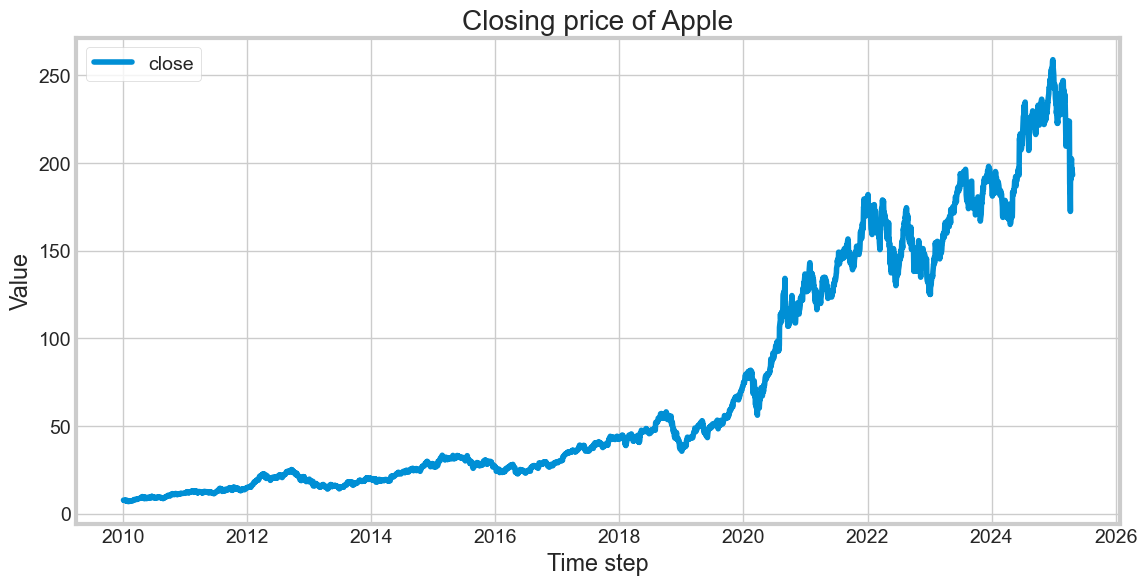

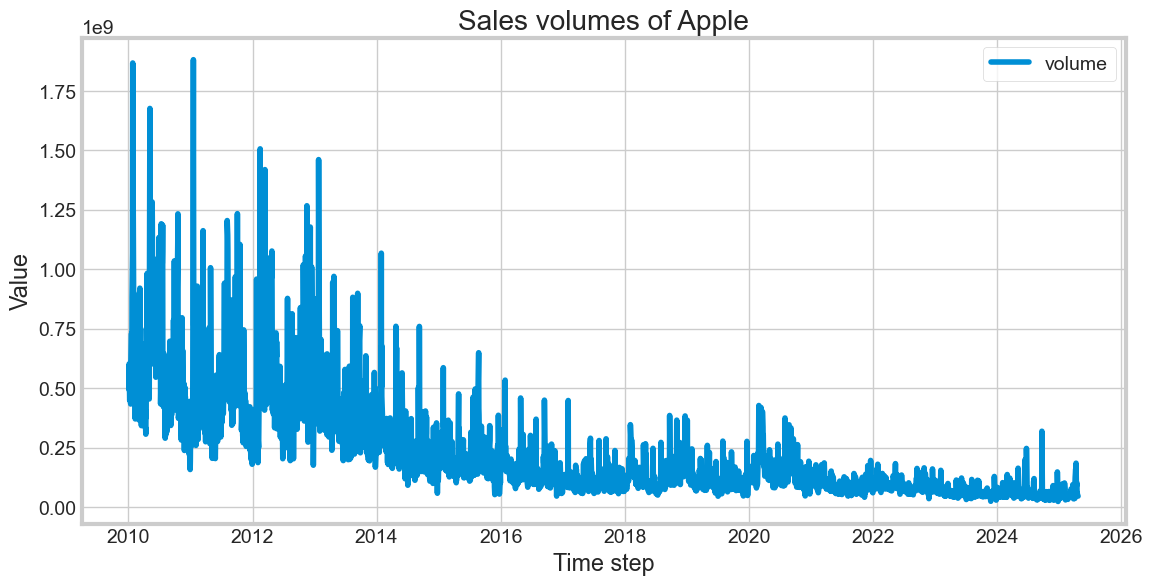

In [59]:
# Graphe du prix de clotûre d'Apple

plotter(df, ["close"], "Closing price of Apple")

# Graphe du volume des ventes d'Apple

plotter(df, ["volume"], "Sales volumes of Apple")

In [57]:
# Définition d'une fonction pour calculer la moyenne mobile sur différentes periodes

def moving_avg(df, ma_days):
    df = df.copy()
    
    for ma in ma_days:
        col_name = f"ma_{ma}"
        df[col_name] = df["close"].rolling(ma).mean()

    return df

,open,high,low,close,volume,ma_10,ma_20,ma_50
date,,,,,,,,
2025-04-14,211.44,212.94,201.16,202.52,101352911,198.247,208.6330,223.8198
2025-04-15,201.86,203.51,199.80,202.14,51343900,196.142,208.1055,223.3024
2025-04-16,198.36,200.70,192.37,194.27,59732423,193.180,207.0570,222.5318
2025-04-17,197.20,198.83,194.42,196.98,52164675,192.559,206.2010,221.8220
2025-04-21,193.27,193.80,189.81,193.16,45860324,193.037,204.9455,221.0208


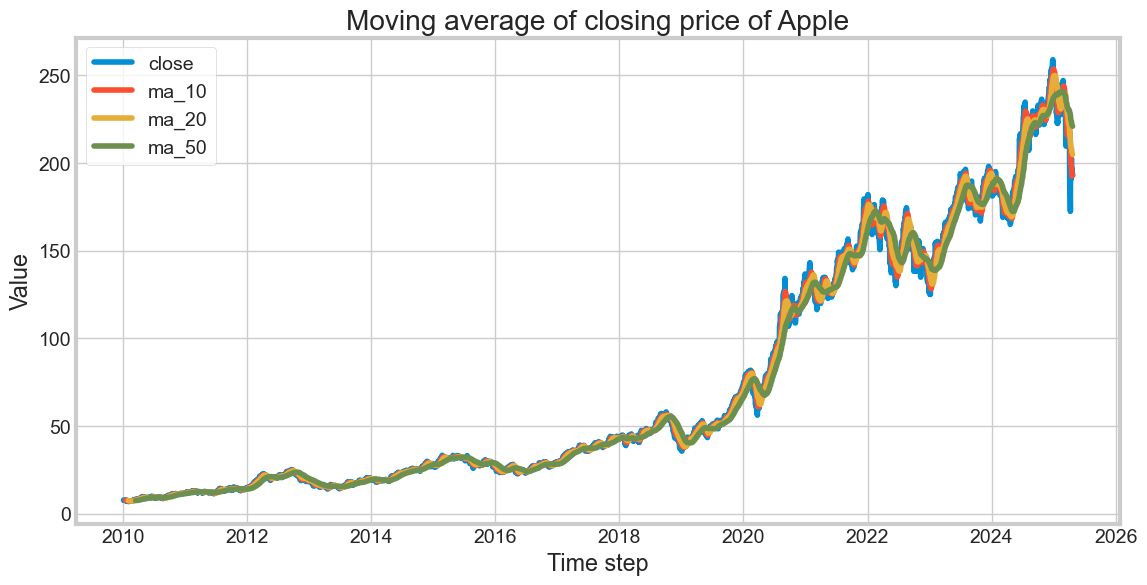

In [58]:
# Calcul des moyennes mobiles sur 10, 20 et 50 jours

ma_days = [10, 20, 50]
df = moving_avg(df, ma_days)
display(df.tail())

# Graphe des moyennes mobiles

plotter(df, ["close", "ma_10", "ma_20", "ma_50"], "Moving average of closing price of Apple")

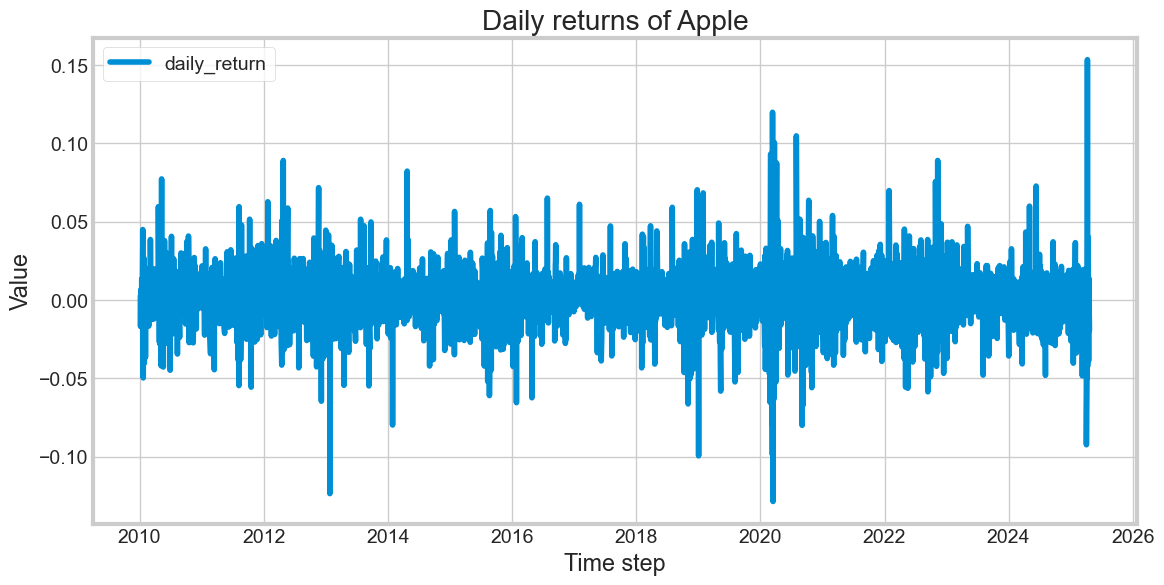

In [60]:
# Calcul des rentrées quotidients

df['daily_return'] = df['close'].pct_change()

# Graphe des rentrées quotidients

plotter(df, ['daily_return'], "Daily returns of Apple")

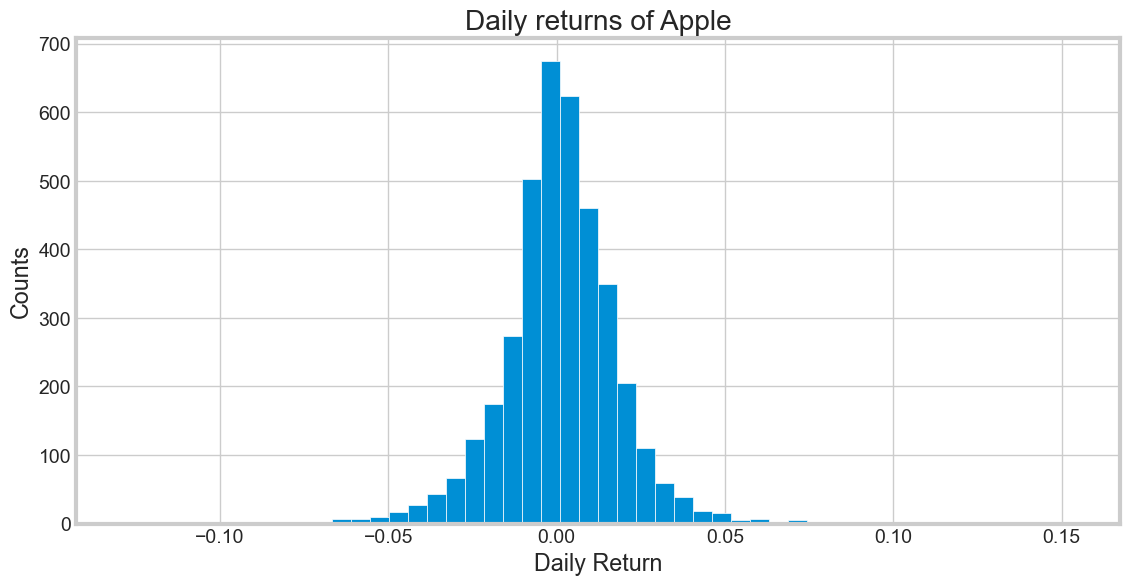

In [61]:
# Graphe des rentrées quotidients sous forme d'histogramme
# Permet de mieux appréhender la fréquence des différentes valeurs

plt.figure(figsize=(12, 6))
plt.hist(df["daily_return"], bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title("Daily returns of Apple")
plt.show()

In [64]:
# Importation de toutes les données

df_all = pd.read_pickle("./data/source.pkl")

# Création d'un dataframe contenant les prix de clotûres de toutes les entreprises

df_close = pd.DataFrame()

for company_name, company in df_all.items():
    df_close[company_name] = company["close"]

# Création d'un dataframe contenant les rentrées quotidients de toutes les entreprises

df_returns = df_close.pct_change()

display(df_close.tail())
display(df_returns.tail())

,APPLE,MICROSOFT,AMAZON,ALPHABET,NVIDIA,META,TESLA
date,,,,,,,
2025-04-14,202.52,387.81,182.12,161.47,110.71,531.48,252.35
2025-04-15,202.14,385.73,179.59,158.68,112.20,521.52,254.11
2025-04-16,194.27,371.61,174.33,155.50,104.49,502.31,241.55
2025-04-17,196.98,367.78,172.61,153.36,101.49,501.48,241.37
2025-04-21,193.16,359.12,167.32,149.86,96.91,484.66,227.50


,APPLE,MICROSOFT,AMAZON,ALPHABET,NVIDIA,META,TESLA
date,,,,,,,
2025-04-14,0.022054,-0.001648,-0.014875,0.012986,-0.001983,-0.022242,0.000159
2025-04-15,-0.001876,-0.005363,-0.013892,-0.017279,0.013459,-0.018740,0.006974
2025-04-16,-0.038933,-0.036606,-0.029289,-0.020040,-0.068717,-0.036835,-0.049427
2025-04-17,0.013950,-0.010307,-0.009866,-0.013762,-0.028711,-0.001652,-0.000745
2025-04-21,-0.019393,-0.023547,-0.030647,-0.022822,-0.045128,-0.033541,-0.057464


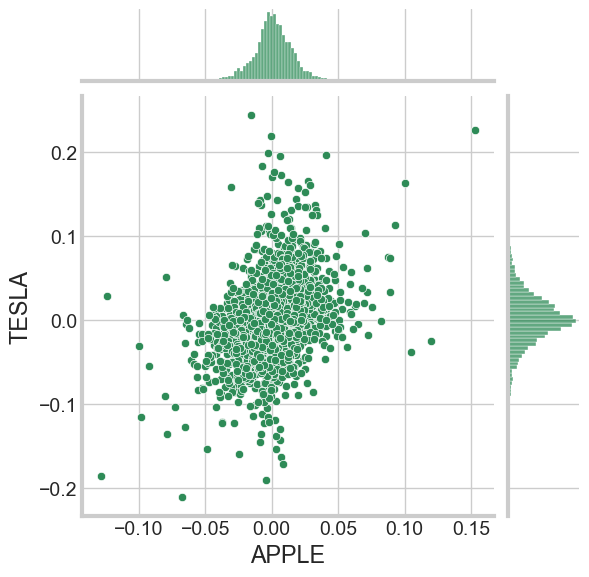

In [68]:
# Graphe de comparaison des rentrées quotidients entre Apple et Tesla
sns.jointplot(x='APPLE', y='TESLA', data=df_returns, kind='scatter', color='seagreen')
plt.show()

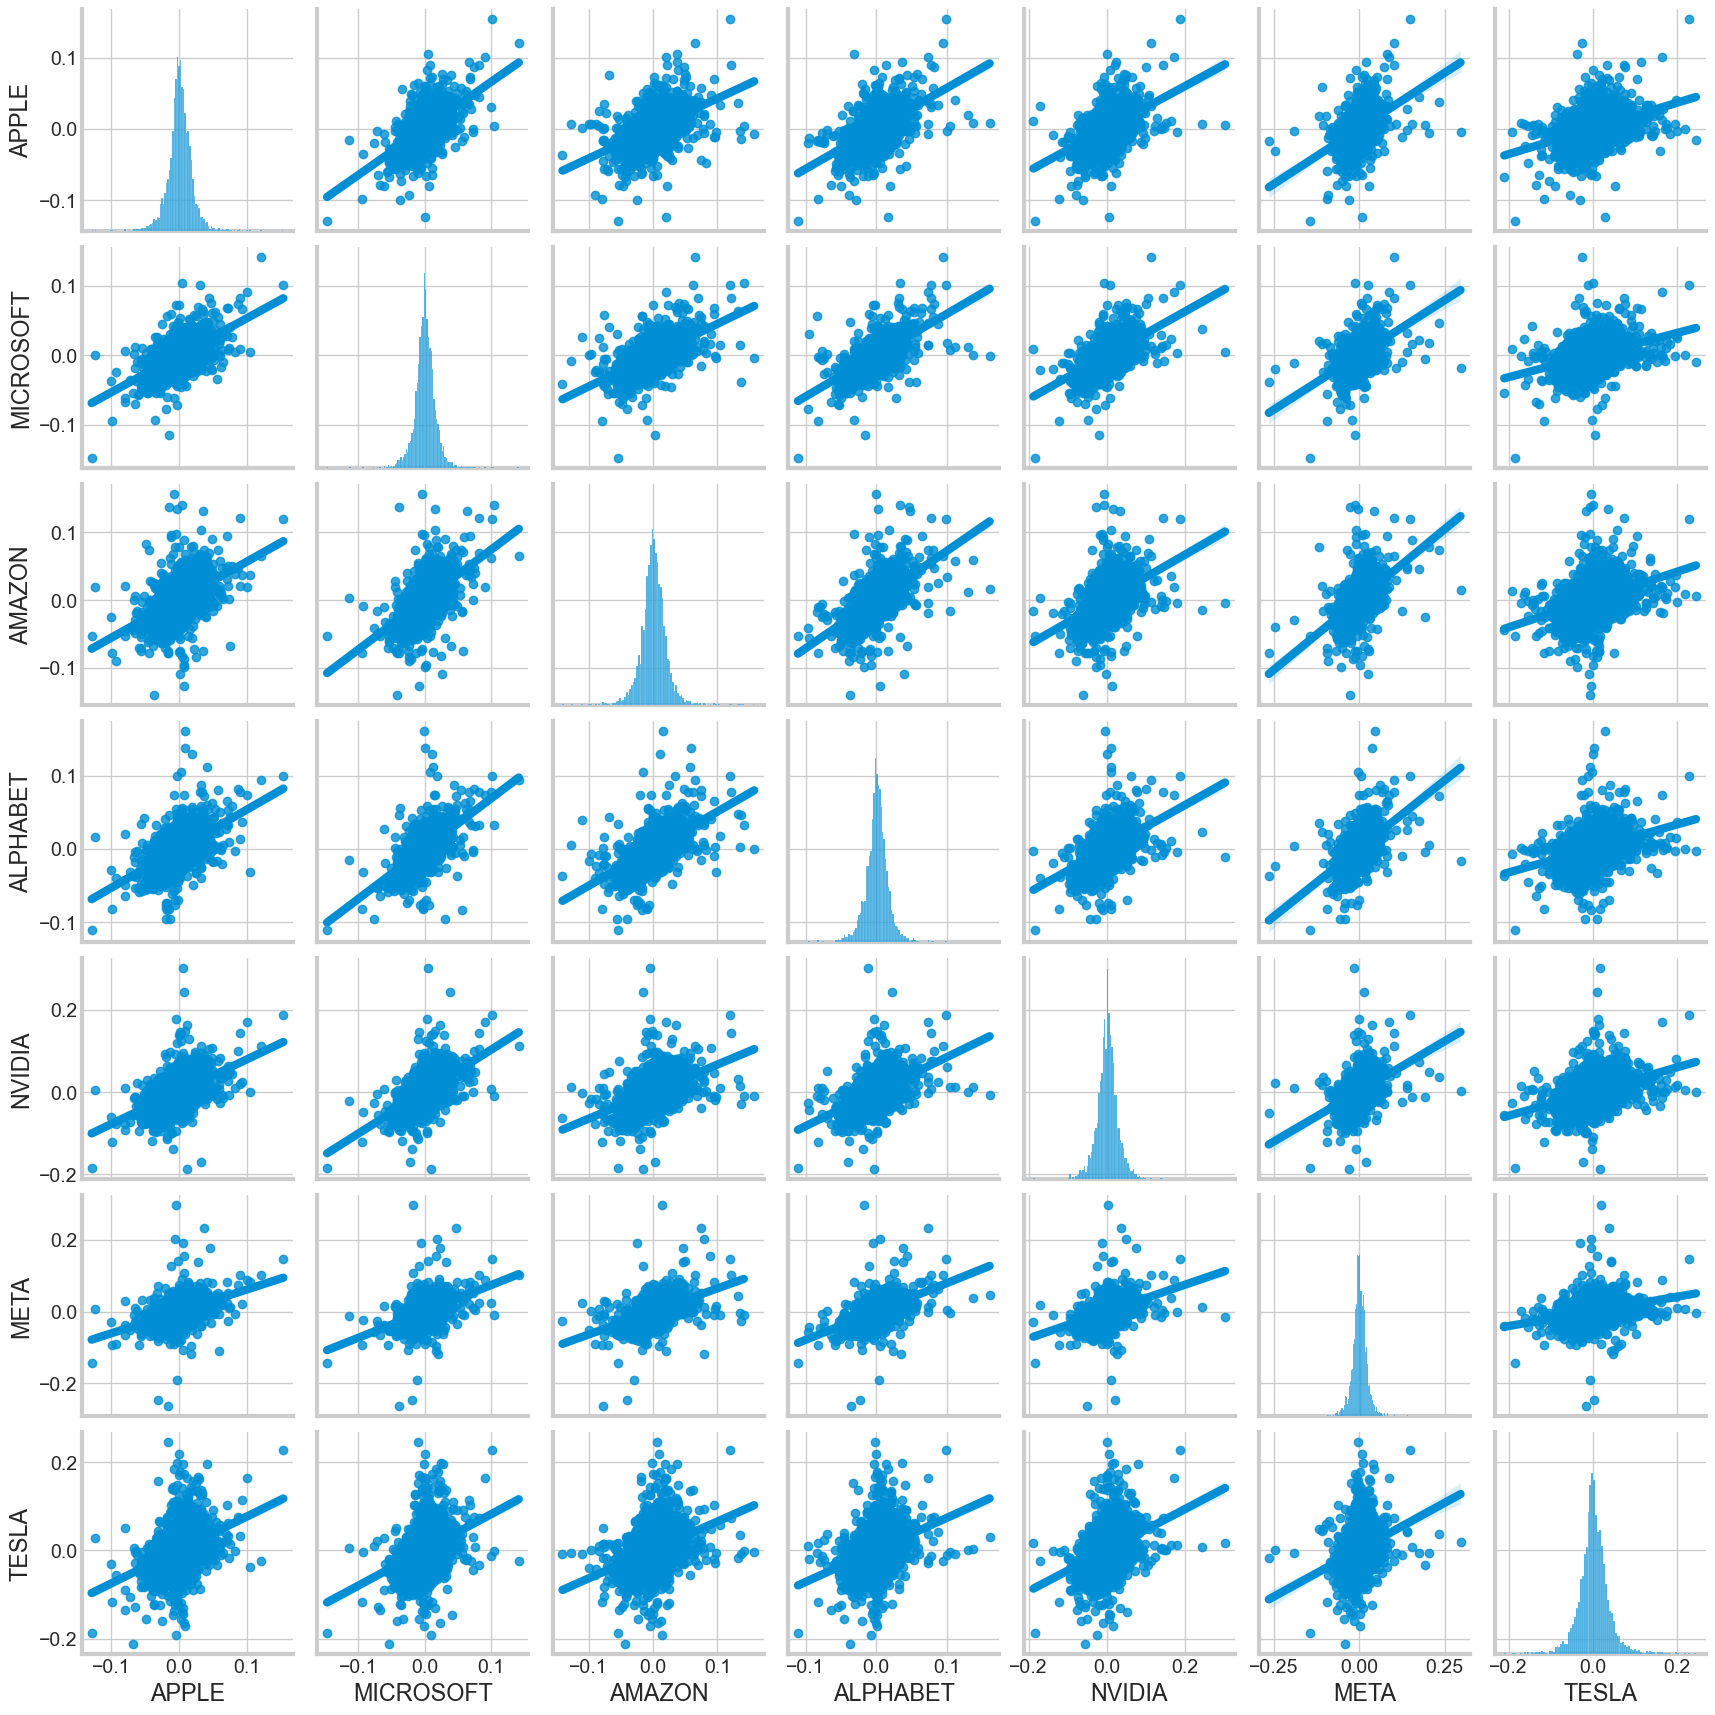

In [70]:
# Comparaisons pour toutes les paires d'entreprises

sns.pairplot(df_returns, kind='reg')
plt.show()

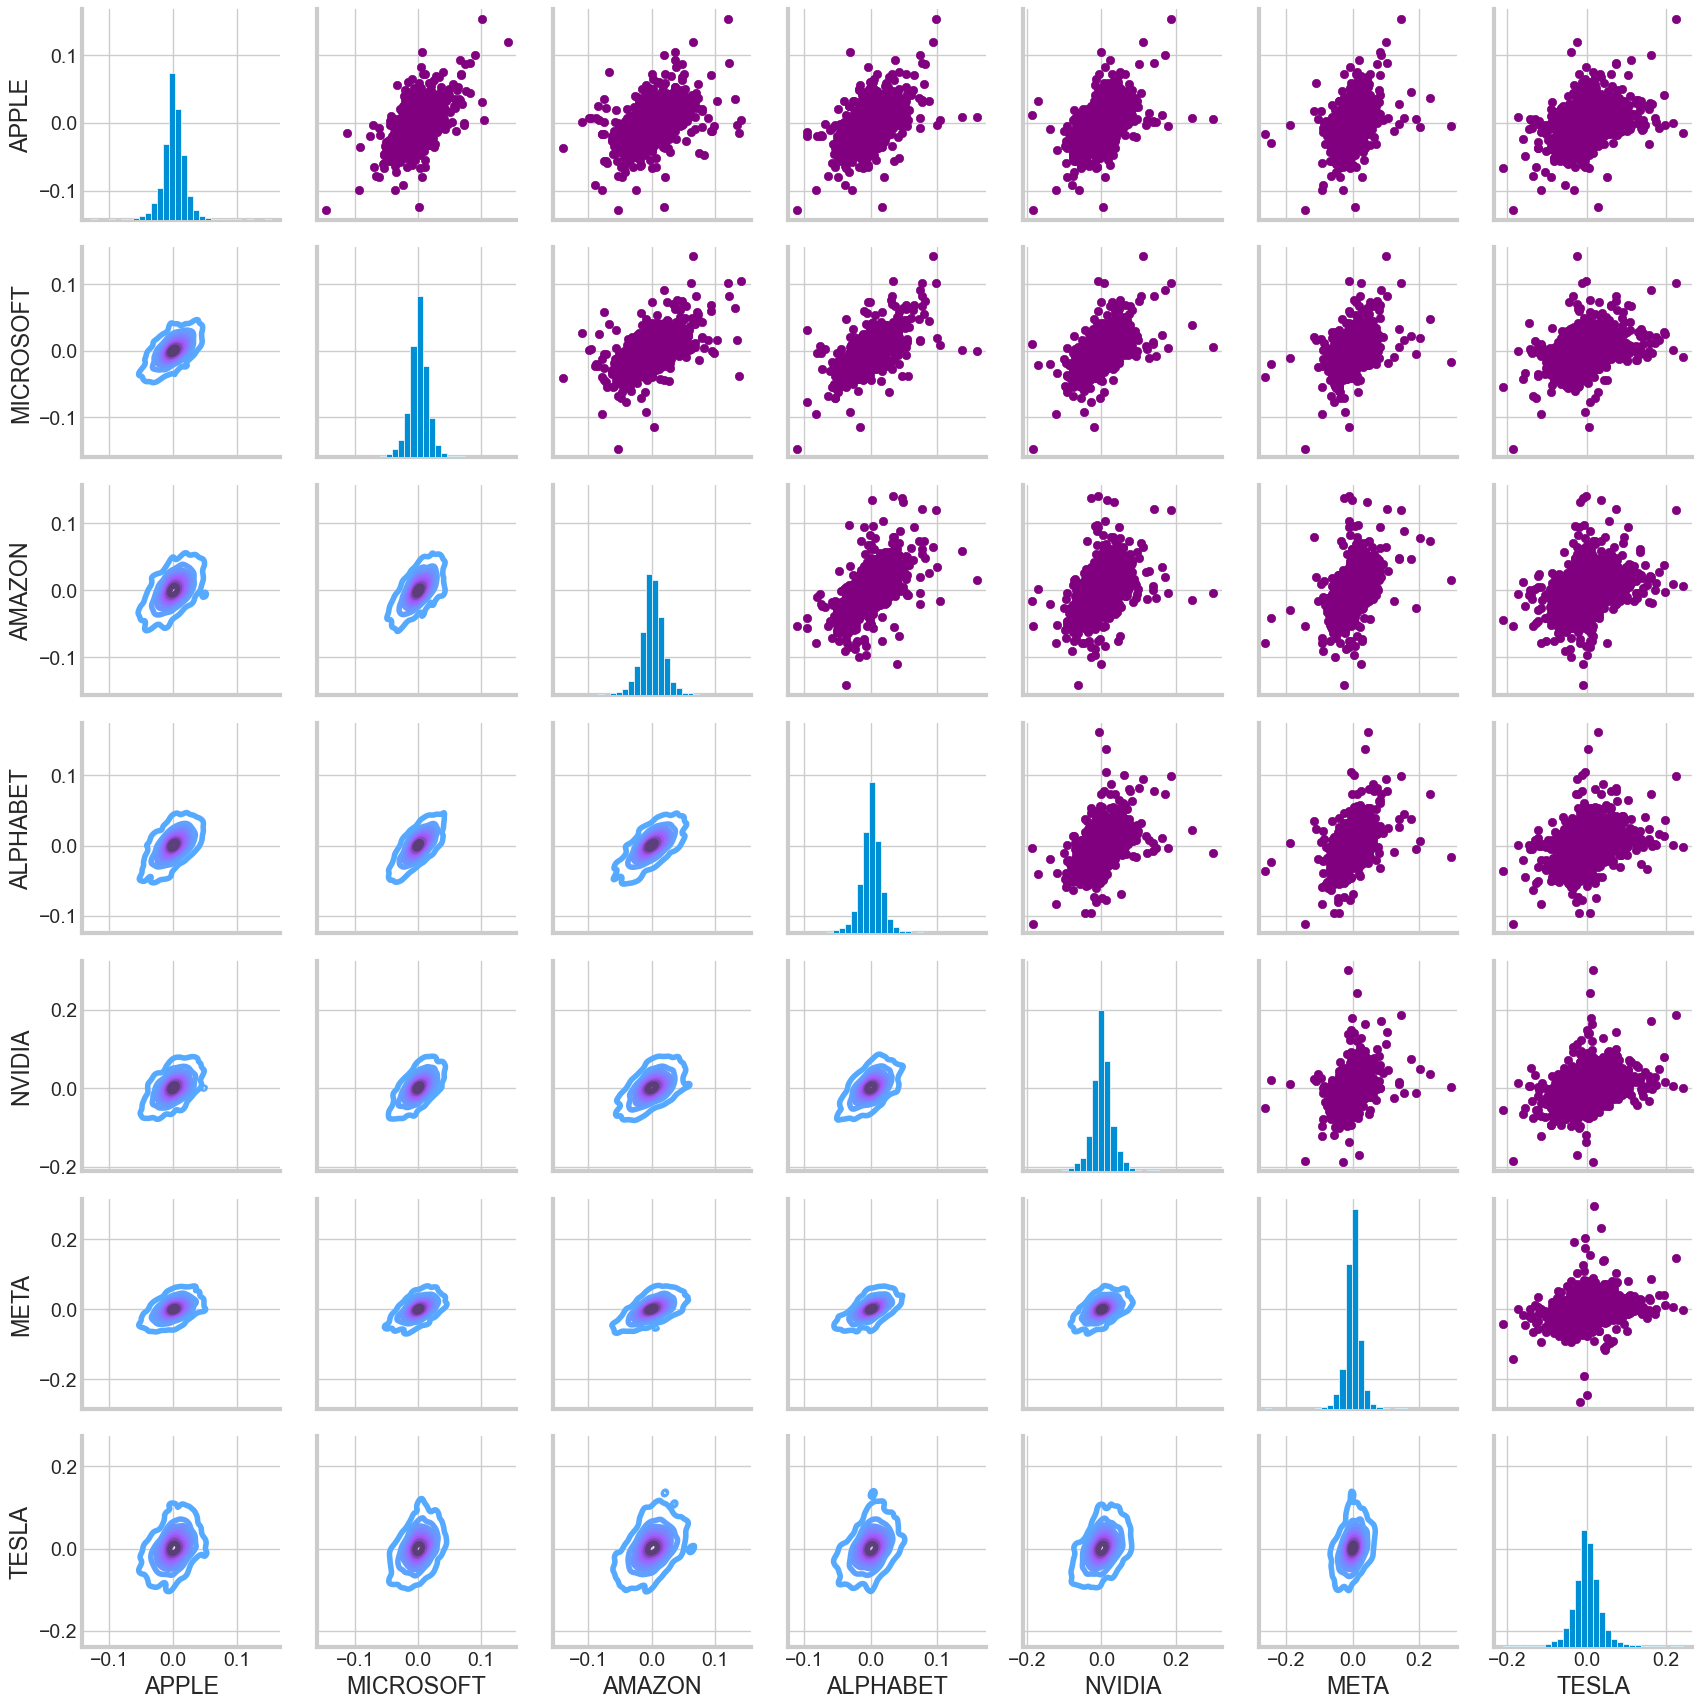

In [72]:
# Autre proposition de visualisation

fig_returns = sns.PairGrid(df_returns.dropna())
fig_returns.map_upper(plt.scatter, color='purple')
fig_returns.map_lower(sns.kdeplot, cmap='cool_d')
fig_returns.map_diag(plt.hist, bins=30)
plt.show()

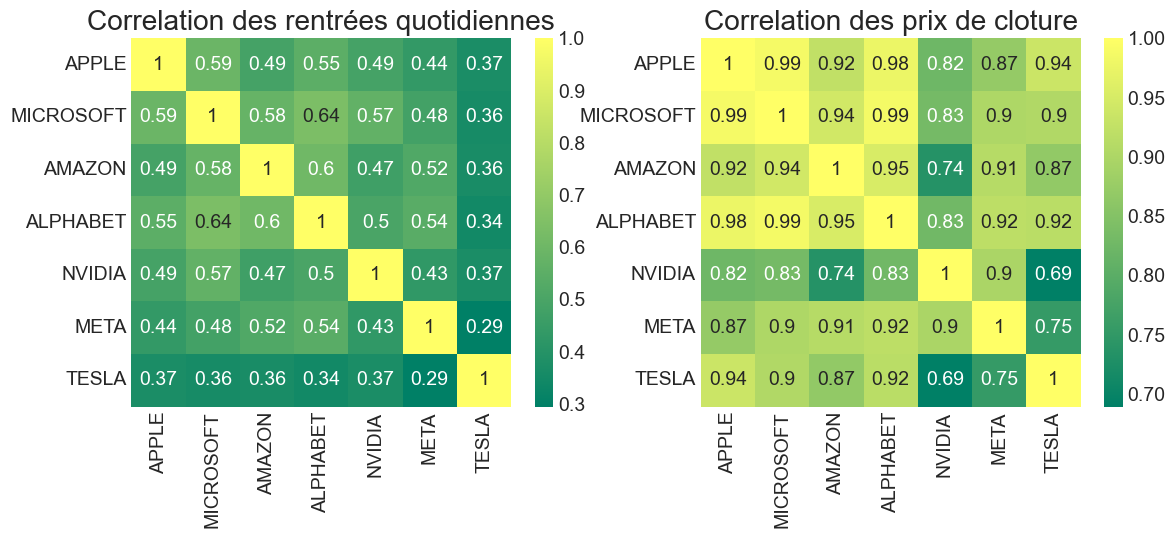

In [77]:
# Matrices de correlation pour :
# - les rentrées journaliers
# - les prix de cloture

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(df_returns.corr(), annot=True, cmap='summer')
plt.title('Correlation des rentrées quotidiennes')

plt.subplot(2, 2, 2)
sns.heatmap(df_close.corr(), annot=True, cmap='summer')
plt.title('Correlation des prix de cloture')

plt.show()

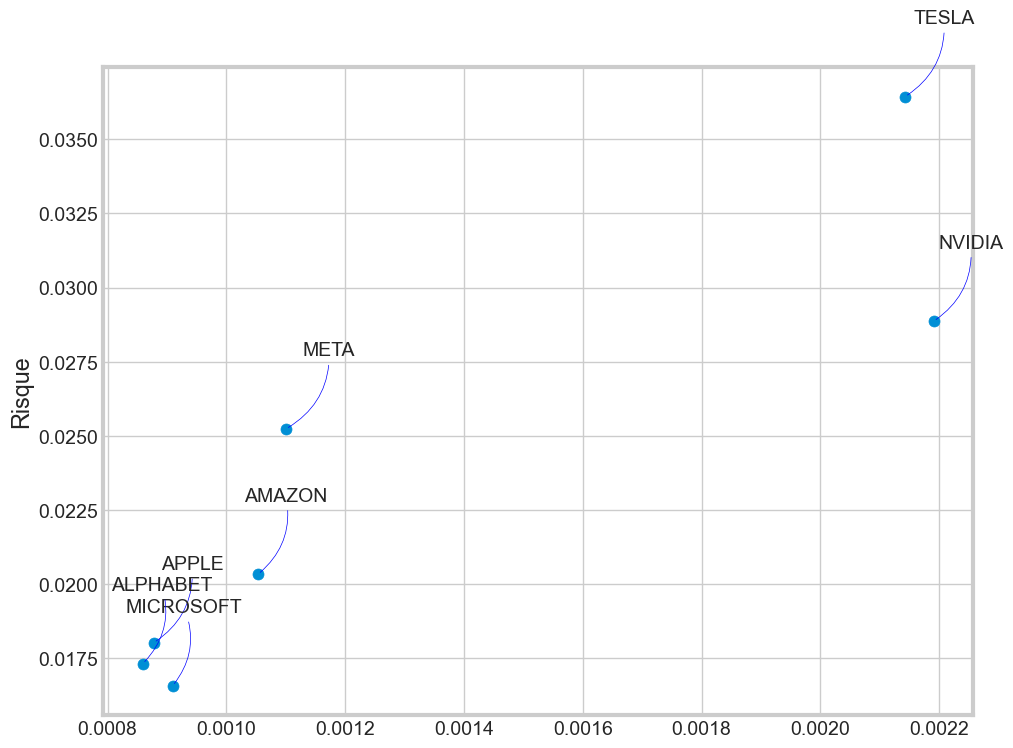

In [79]:
# Le graphique ci-dessous permet de mettre en relation les rentrées attendues par rapport aux rentrées réelles

returns = df_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel('')
plt.ylabel('Risque')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()